In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import torch
from torch.utils.data import DataLoader

import sys
sys.path.append("../")

from Utils.utils import (
    COLORMAP,
    heatmaps_to_coordinates,
    N_KEYPOINTS,
    RAW_IMG_SIZE,
    MODEL_IMG_SIZE,
    show_batch_predictions,
    DATASET_MEANS,
    DATASET_STDS,
)
from Utils.model import ShallowUNet
from Utils.dataset import FreiHAND

### Config Parameters For Inference

In [3]:
config = {
    "data_dir": "FreiHAND_pub_v2",
    "model_path": "model_final",
    "test_batch_size": 4,
    "device": "cpu",
}

### Loading Test Dataset

In [4]:
test_dataset = FreiHAND(config=config, set_type="test")
test_dataloader = DataLoader(
    test_dataset,
    config["test_batch_size"],
    shuffle=True,
    drop_last=False,
    num_workers=2,
)

### Loading Trained Model

In [5]:
model = ShallowUNet(3, 21)
model.load_state_dict(
    torch.load(config["model_path"], map_location=torch.device(config["device"]))
)
model.eval()
print("Model loaded")

Model loaded


### Evaluation of Test Data

In [6]:
accuracy_all = []

for data in tqdm(test_dataloader):
    inputs = data["image"]
    pred_heatmaps = model(inputs)
    pred_heatmaps = pred_heatmaps.detach().numpy()
    true_keypoints = data["keypoints"].numpy()
    pred_keypoints = heatmaps_to_coordinates(pred_heatmaps)

    accuracy_keypoint = ((true_keypoints - pred_keypoints) ** 2).sum(axis=2) ** (1 / 2)
    accuracy_image = accuracy_keypoint.mean(axis=1)
    accuracy_all.extend(list(accuracy_image))

  0%|          | 1/390 [00:03<22:46,  3.51s/it]

torch.Size([4, 3, 128, 128])
torch.Size([4, 3, 128, 128])


  1%|          | 3/390 [00:03<06:18,  1.02it/s]

torch.Size([4, 3, 128, 128])
torch.Size([4, 3, 128, 128])
torch.Size([4, 3, 128, 128])


  2%|▏         | 7/390 [00:04<02:06,  3.02it/s]

torch.Size([4, 3, 128, 128])
torch.Size([4, 3, 128, 128])
torch.Size([4, 3, 128, 128])


  2%|▏         | 9/390 [00:04<01:30,  4.23it/s]

torch.Size([4, 3, 128, 128])
torch.Size([4, 3, 128, 128])
torch.Size([4, 3, 128, 128])


  3%|▎         | 13/390 [00:04<00:55,  6.78it/s]

torch.Size([4, 3, 128, 128])
torch.Size([4, 3, 128, 128])
torch.Size([4, 3, 128, 128])


  4%|▍         | 15/390 [00:04<00:46,  7.98it/s]

torch.Size([4, 3, 128, 128])
torch.Size([4, 3, 128, 128])
torch.Size([4, 3, 128, 128])


  5%|▍         | 19/390 [00:04<00:37,  9.94it/s]

torch.Size([4, 3, 128, 128])
torch.Size([4, 3, 128, 128])
torch.Size([4, 3, 128, 128])


  5%|▌         | 21/390 [00:05<00:34, 10.63it/s]

torch.Size([4, 3, 128, 128])
torch.Size([4, 3, 128, 128])
torch.Size([4, 3, 128, 128])


  6%|▋         | 25/390 [00:05<00:32, 11.28it/s]

torch.Size([4, 3, 128, 128])
torch.Size([4, 3, 128, 128])
torch.Size([4, 3, 128, 128])


  7%|▋         | 27/390 [00:05<00:31, 11.71it/s]

torch.Size([4, 3, 128, 128])
torch.Size([4, 3, 128, 128])
torch.Size([4, 3, 128, 128])


  8%|▊         | 31/390 [00:05<00:29, 12.14it/s]

torch.Size([4, 3, 128, 128])
torch.Size([4, 3, 128, 128])
torch.Size([4, 3, 128, 128])


  8%|▊         | 33/390 [00:06<00:28, 12.36it/s]

torch.Size([4, 3, 128, 128])
torch.Size([4, 3, 128, 128])
torch.Size([4, 3, 128, 128])


  9%|▉         | 37/390 [00:06<00:28, 12.46it/s]

torch.Size([4, 3, 128, 128])
torch.Size([4, 3, 128, 128])
torch.Size([4, 3, 128, 128])


 10%|█         | 39/390 [00:06<00:28, 12.52it/s]

torch.Size([4, 3, 128, 128])
torch.Size([4, 3, 128, 128])
torch.Size([4, 3, 128, 128])


 11%|█         | 43/390 [00:06<00:27, 12.64it/s]

torch.Size([4, 3, 128, 128])
torch.Size([4, 3, 128, 128])
torch.Size([4, 3, 128, 128])


 12%|█▏        | 45/390 [00:07<00:27, 12.64it/s]

torch.Size([4, 3, 128, 128])
torch.Size([4, 3, 128, 128])
torch.Size([4, 3, 128, 128])


 13%|█▎        | 49/390 [00:07<00:26, 12.69it/s]

torch.Size([4, 3, 128, 128])
torch.Size([4, 3, 128, 128])
torch.Size([4, 3, 128, 128])


 13%|█▎        | 51/390 [00:07<00:26, 12.75it/s]

torch.Size([4, 3, 128, 128])
torch.Size([4, 3, 128, 128])
torch.Size([4, 3, 128, 128])


 14%|█▍        | 55/390 [00:07<00:26, 12.78it/s]

torch.Size([4, 3, 128, 128])
torch.Size([4, 3, 128, 128])
torch.Size([4, 3, 128, 128])


 15%|█▍        | 57/390 [00:07<00:26, 12.72it/s]

torch.Size([4, 3, 128, 128])
torch.Size([4, 3, 128, 128])
torch.Size([4, 3, 128, 128])


 16%|█▌        | 61/390 [00:08<00:25, 12.66it/s]

torch.Size([4, 3, 128, 128])
torch.Size([4, 3, 128, 128])
torch.Size([4, 3, 128, 128])


 16%|█▌        | 63/390 [00:08<00:25, 12.73it/s]

torch.Size([4, 3, 128, 128])
torch.Size([4, 3, 128, 128])
torch.Size([4, 3, 128, 128])


 17%|█▋        | 67/390 [00:08<00:25, 12.71it/s]

torch.Size([4, 3, 128, 128])
torch.Size([4, 3, 128, 128])
torch.Size([4, 3, 128, 128])


 18%|█▊        | 69/390 [00:08<00:25, 12.75it/s]

torch.Size([4, 3, 128, 128])
torch.Size([4, 3, 128, 128])
torch.Size([4, 3, 128, 128])


 19%|█▊        | 73/390 [00:09<00:25, 12.66it/s]

torch.Size([4, 3, 128, 128])
torch.Size([4, 3, 128, 128])
torch.Size([4, 3, 128, 128])


 19%|█▉        | 75/390 [00:09<00:24, 12.73it/s]

torch.Size([4, 3, 128, 128])
torch.Size([4, 3, 128, 128])
torch.Size([4, 3, 128, 128])


 20%|██        | 79/390 [00:09<00:24, 12.75it/s]

torch.Size([4, 3, 128, 128])
torch.Size([4, 3, 128, 128])
torch.Size([4, 3, 128, 128])


 21%|██        | 81/390 [00:09<00:24, 12.72it/s]

torch.Size([4, 3, 128, 128])
torch.Size([4, 3, 128, 128])
torch.Size([4, 3, 128, 128])


 22%|██▏       | 85/390 [00:10<00:23, 12.78it/s]

torch.Size([4, 3, 128, 128])
torch.Size([4, 3, 128, 128])
torch.Size([4, 3, 128, 128])


 22%|██▏       | 87/390 [00:10<00:23, 12.79it/s]

torch.Size([4, 3, 128, 128])
torch.Size([4, 3, 128, 128])
torch.Size([4, 3, 128, 128])


 23%|██▎       | 91/390 [00:10<00:23, 12.78it/s]

torch.Size([4, 3, 128, 128])
torch.Size([4, 3, 128, 128])
torch.Size([4, 3, 128, 128])


 24%|██▍       | 93/390 [00:10<00:23, 12.74it/s]

torch.Size([4, 3, 128, 128])
torch.Size([4, 3, 128, 128])
torch.Size([4, 3, 128, 128])


 25%|██▍       | 97/390 [00:11<00:22, 12.78it/s]

torch.Size([4, 3, 128, 128])
torch.Size([4, 3, 128, 128])
torch.Size([4, 3, 128, 128])


 25%|██▌       | 99/390 [00:11<00:22, 12.74it/s]

torch.Size([4, 3, 128, 128])
torch.Size([4, 3, 128, 128])
torch.Size([4, 3, 128, 128])


 26%|██▋       | 103/390 [00:11<00:22, 12.77it/s]

torch.Size([4, 3, 128, 128])
torch.Size([4, 3, 128, 128])
torch.Size([4, 3, 128, 128])


 27%|██▋       | 105/390 [00:11<00:22, 12.78it/s]

torch.Size([4, 3, 128, 128])
torch.Size([4, 3, 128, 128])
torch.Size([4, 3, 128, 128])


 28%|██▊       | 109/390 [00:12<00:21, 12.78it/s]

torch.Size([4, 3, 128, 128])
torch.Size([4, 3, 128, 128])
torch.Size([4, 3, 128, 128])


 28%|██▊       | 111/390 [00:12<00:21, 12.77it/s]

torch.Size([4, 3, 128, 128])
torch.Size([4, 3, 128, 128])
torch.Size([4, 3, 128, 128])


 29%|██▉       | 115/390 [00:12<00:21, 12.87it/s]

torch.Size([4, 3, 128, 128])
torch.Size([4, 3, 128, 128])
torch.Size([4, 3, 128, 128])


 30%|███       | 117/390 [00:12<00:21, 12.73it/s]

torch.Size([4, 3, 128, 128])
torch.Size([4, 3, 128, 128])
torch.Size([4, 3, 128, 128])


 31%|███       | 121/390 [00:12<00:21, 12.74it/s]

torch.Size([4, 3, 128, 128])
torch.Size([4, 3, 128, 128])
torch.Size([4, 3, 128, 128])


 32%|███▏      | 123/390 [00:13<00:20, 12.79it/s]

torch.Size([4, 3, 128, 128])
torch.Size([4, 3, 128, 128])
torch.Size([4, 3, 128, 128])


 33%|███▎      | 127/390 [00:13<00:20, 12.74it/s]

torch.Size([4, 3, 128, 128])
torch.Size([4, 3, 128, 128])
torch.Size([4, 3, 128, 128])


 33%|███▎      | 129/390 [00:13<00:20, 12.74it/s]

torch.Size([4, 3, 128, 128])
torch.Size([4, 3, 128, 128])
torch.Size([4, 3, 128, 128])


 34%|███▍      | 133/390 [00:13<00:20, 12.74it/s]

torch.Size([4, 3, 128, 128])
torch.Size([4, 3, 128, 128])
torch.Size([4, 3, 128, 128])


 35%|███▍      | 135/390 [00:14<00:19, 12.77it/s]

torch.Size([4, 3, 128, 128])
torch.Size([4, 3, 128, 128])
torch.Size([4, 3, 128, 128])


 36%|███▌      | 139/390 [00:14<00:19, 12.84it/s]

torch.Size([4, 3, 128, 128])
torch.Size([4, 3, 128, 128])
torch.Size([4, 3, 128, 128])


 36%|███▌      | 141/390 [00:14<00:19, 12.83it/s]

torch.Size([4, 3, 128, 128])
torch.Size([4, 3, 128, 128])
torch.Size([4, 3, 128, 128])


 37%|███▋      | 145/390 [00:14<00:19, 12.76it/s]

torch.Size([4, 3, 128, 128])
torch.Size([4, 3, 128, 128])
torch.Size([4, 3, 128, 128])


 38%|███▊      | 147/390 [00:15<00:19, 12.68it/s]

torch.Size([4, 3, 128, 128])
torch.Size([4, 3, 128, 128])
torch.Size([4, 3, 128, 128])


 39%|███▊      | 151/390 [00:15<00:18, 12.72it/s]

torch.Size([4, 3, 128, 128])
torch.Size([4, 3, 128, 128])
torch.Size([4, 3, 128, 128])


 39%|███▉      | 153/390 [00:15<00:19, 12.40it/s]

torch.Size([4, 3, 128, 128])
torch.Size([4, 3, 128, 128])
torch.Size([4, 3, 128, 128])


 40%|████      | 157/390 [00:15<00:18, 12.36it/s]

torch.Size([4, 3, 128, 128])
torch.Size([4, 3, 128, 128])
torch.Size([4, 3, 128, 128])


 41%|████      | 159/390 [00:15<00:18, 12.42it/s]

torch.Size([4, 3, 128, 128])
torch.Size([4, 3, 128, 128])
torch.Size([4, 3, 128, 128])


 42%|████▏     | 163/390 [00:16<00:18, 12.47it/s]

torch.Size([4, 3, 128, 128])
torch.Size([4, 3, 128, 128])
torch.Size([4, 3, 128, 128])


 42%|████▏     | 165/390 [00:16<00:17, 12.55it/s]

torch.Size([4, 3, 128, 128])
torch.Size([4, 3, 128, 128])
torch.Size([4, 3, 128, 128])


 43%|████▎     | 169/390 [00:16<00:17, 12.37it/s]

torch.Size([4, 3, 128, 128])
torch.Size([4, 3, 128, 128])
torch.Size([4, 3, 128, 128])


 44%|████▍     | 171/390 [00:16<00:17, 12.39it/s]

torch.Size([4, 3, 128, 128])
torch.Size([4, 3, 128, 128])
torch.Size([4, 3, 128, 128])


 45%|████▍     | 175/390 [00:17<00:16, 12.67it/s]

torch.Size([4, 3, 128, 128])
torch.Size([4, 3, 128, 128])
torch.Size([4, 3, 128, 128])


 45%|████▌     | 177/390 [00:17<00:16, 12.64it/s]

torch.Size([4, 3, 128, 128])
torch.Size([4, 3, 128, 128])
torch.Size([4, 3, 128, 128])


 46%|████▋     | 181/390 [00:17<00:16, 12.62it/s]

torch.Size([4, 3, 128, 128])
torch.Size([4, 3, 128, 128])
torch.Size([4, 3, 128, 128])


 47%|████▋     | 183/390 [00:17<00:16, 12.53it/s]

torch.Size([4, 3, 128, 128])
torch.Size([4, 3, 128, 128])
torch.Size([4, 3, 128, 128])


 48%|████▊     | 187/390 [00:18<00:16, 12.61it/s]

torch.Size([4, 3, 128, 128])
torch.Size([4, 3, 128, 128])
torch.Size([4, 3, 128, 128])


 48%|████▊     | 189/390 [00:18<00:15, 12.62it/s]

torch.Size([4, 3, 128, 128])
torch.Size([4, 3, 128, 128])
torch.Size([4, 3, 128, 128])


 49%|████▉     | 193/390 [00:18<00:15, 12.35it/s]

torch.Size([4, 3, 128, 128])
torch.Size([4, 3, 128, 128])
torch.Size([4, 3, 128, 128])


 50%|█████     | 195/390 [00:18<00:15, 12.33it/s]

torch.Size([4, 3, 128, 128])
torch.Size([4, 3, 128, 128])
torch.Size([4, 3, 128, 128])


 51%|█████     | 199/390 [00:19<00:15, 12.26it/s]

torch.Size([4, 3, 128, 128])
torch.Size([4, 3, 128, 128])
torch.Size([4, 3, 128, 128])


 52%|█████▏    | 201/390 [00:19<00:15, 12.17it/s]

torch.Size([4, 3, 128, 128])
torch.Size([4, 3, 128, 128])
torch.Size([4, 3, 128, 128])


 53%|█████▎    | 205/390 [00:19<00:15, 12.04it/s]

torch.Size([4, 3, 128, 128])
torch.Size([4, 3, 128, 128])
torch.Size([4, 3, 128, 128])


 53%|█████▎    | 207/390 [00:19<00:15, 12.15it/s]

torch.Size([4, 3, 128, 128])
torch.Size([4, 3, 128, 128])
torch.Size([4, 3, 128, 128])


 54%|█████▍    | 211/390 [00:20<00:14, 12.26it/s]

torch.Size([4, 3, 128, 128])
torch.Size([4, 3, 128, 128])
torch.Size([4, 3, 128, 128])


 55%|█████▍    | 213/390 [00:20<00:14, 12.30it/s]

torch.Size([4, 3, 128, 128])
torch.Size([4, 3, 128, 128])
torch.Size([4, 3, 128, 128])


 56%|█████▌    | 217/390 [00:20<00:14, 12.22it/s]

torch.Size([4, 3, 128, 128])
torch.Size([4, 3, 128, 128])
torch.Size([4, 3, 128, 128])


 56%|█████▌    | 219/390 [00:20<00:14, 12.10it/s]

torch.Size([4, 3, 128, 128])
torch.Size([4, 3, 128, 128])
torch.Size([4, 3, 128, 128])


 57%|█████▋    | 223/390 [00:21<00:13, 12.15it/s]

torch.Size([4, 3, 128, 128])
torch.Size([4, 3, 128, 128])
torch.Size([4, 3, 128, 128])


 58%|█████▊    | 225/390 [00:21<00:13, 12.32it/s]

torch.Size([4, 3, 128, 128])
torch.Size([4, 3, 128, 128])
torch.Size([4, 3, 128, 128])


 59%|█████▊    | 229/390 [00:21<00:12, 12.41it/s]

torch.Size([4, 3, 128, 128])
torch.Size([4, 3, 128, 128])
torch.Size([4, 3, 128, 128])


 59%|█████▉    | 231/390 [00:21<00:12, 12.46it/s]

torch.Size([4, 3, 128, 128])
torch.Size([4, 3, 128, 128])
torch.Size([4, 3, 128, 128])


 60%|██████    | 235/390 [00:22<00:12, 12.64it/s]

torch.Size([4, 3, 128, 128])
torch.Size([4, 3, 128, 128])
torch.Size([4, 3, 128, 128])


 61%|██████    | 237/390 [00:22<00:12, 12.74it/s]

torch.Size([4, 3, 128, 128])
torch.Size([4, 3, 128, 128])
torch.Size([4, 3, 128, 128])


 62%|██████▏   | 241/390 [00:22<00:11, 12.50it/s]

torch.Size([4, 3, 128, 128])
torch.Size([4, 3, 128, 128])
torch.Size([4, 3, 128, 128])


 62%|██████▏   | 243/390 [00:22<00:12, 12.05it/s]

torch.Size([4, 3, 128, 128])
torch.Size([4, 3, 128, 128])
torch.Size([4, 3, 128, 128])


 63%|██████▎   | 247/390 [00:23<00:12, 11.58it/s]

torch.Size([4, 3, 128, 128])
torch.Size([4, 3, 128, 128])
torch.Size([4, 3, 128, 128])


 64%|██████▍   | 249/390 [00:23<00:11, 11.89it/s]

torch.Size([4, 3, 128, 128])
torch.Size([4, 3, 128, 128])
torch.Size([4, 3, 128, 128])


 65%|██████▍   | 253/390 [00:23<00:11, 12.44it/s]

torch.Size([4, 3, 128, 128])
torch.Size([4, 3, 128, 128])
torch.Size([4, 3, 128, 128])


 65%|██████▌   | 255/390 [00:23<00:10, 12.41it/s]

torch.Size([4, 3, 128, 128])
torch.Size([4, 3, 128, 128])
torch.Size([4, 3, 128, 128])


 66%|██████▋   | 259/390 [00:24<00:10, 12.56it/s]

torch.Size([4, 3, 128, 128])
torch.Size([4, 3, 128, 128])
torch.Size([4, 3, 128, 128])


 67%|██████▋   | 261/390 [00:24<00:10, 12.59it/s]

torch.Size([4, 3, 128, 128])
torch.Size([4, 3, 128, 128])
torch.Size([4, 3, 128, 128])


 68%|██████▊   | 265/390 [00:24<00:09, 12.67it/s]

torch.Size([4, 3, 128, 128])
torch.Size([4, 3, 128, 128])
torch.Size([4, 3, 128, 128])


 68%|██████▊   | 267/390 [00:24<00:09, 12.84it/s]

torch.Size([4, 3, 128, 128])
torch.Size([4, 3, 128, 128])
torch.Size([4, 3, 128, 128])


 69%|██████▉   | 271/390 [00:25<00:09, 12.46it/s]

torch.Size([4, 3, 128, 128])
torch.Size([4, 3, 128, 128])
torch.Size([4, 3, 128, 128])


 70%|███████   | 273/390 [00:25<00:09, 12.38it/s]

torch.Size([4, 3, 128, 128])
torch.Size([4, 3, 128, 128])
torch.Size([4, 3, 128, 128])


 71%|███████   | 277/390 [00:25<00:09, 11.97it/s]

torch.Size([4, 3, 128, 128])
torch.Size([4, 3, 128, 128])
torch.Size([4, 3, 128, 128])


 72%|███████▏  | 279/390 [00:25<00:09, 11.46it/s]

torch.Size([4, 3, 128, 128])
torch.Size([4, 3, 128, 128])
torch.Size([4, 3, 128, 128])


 73%|███████▎  | 283/390 [00:26<00:09, 11.65it/s]

torch.Size([4, 3, 128, 128])
torch.Size([4, 3, 128, 128])
torch.Size([4, 3, 128, 128])


 73%|███████▎  | 285/390 [00:26<00:08, 11.68it/s]

torch.Size([4, 3, 128, 128])
torch.Size([4, 3, 128, 128])
torch.Size([4, 3, 128, 128])


 74%|███████▍  | 289/390 [00:26<00:08, 11.91it/s]

torch.Size([4, 3, 128, 128])
torch.Size([4, 3, 128, 128])
torch.Size([4, 3, 128, 128])


 75%|███████▍  | 291/390 [00:26<00:08, 12.02it/s]

torch.Size([4, 3, 128, 128])
torch.Size([4, 3, 128, 128])
torch.Size([4, 3, 128, 128])


 76%|███████▌  | 295/390 [00:27<00:07, 12.02it/s]

torch.Size([4, 3, 128, 128])
torch.Size([4, 3, 128, 128])
torch.Size([4, 3, 128, 128])


 76%|███████▌  | 297/390 [00:27<00:07, 12.07it/s]

torch.Size([4, 3, 128, 128])
torch.Size([4, 3, 128, 128])
torch.Size([4, 3, 128, 128])


 77%|███████▋  | 301/390 [00:27<00:07, 12.40it/s]

torch.Size([4, 3, 128, 128])
torch.Size([4, 3, 128, 128])
torch.Size([4, 3, 128, 128])


 78%|███████▊  | 303/390 [00:27<00:06, 12.48it/s]

torch.Size([4, 3, 128, 128])
torch.Size([4, 3, 128, 128])
torch.Size([4, 3, 128, 128])


 79%|███████▊  | 307/390 [00:28<00:06, 12.45it/s]

torch.Size([4, 3, 128, 128])
torch.Size([4, 3, 128, 128])
torch.Size([4, 3, 128, 128])


 79%|███████▉  | 309/390 [00:28<00:06, 12.53it/s]

torch.Size([4, 3, 128, 128])
torch.Size([4, 3, 128, 128])
torch.Size([4, 3, 128, 128])


 80%|████████  | 313/390 [00:28<00:06, 12.61it/s]

torch.Size([4, 3, 128, 128])
torch.Size([4, 3, 128, 128])
torch.Size([4, 3, 128, 128])


 81%|████████  | 315/390 [00:28<00:05, 12.60it/s]

torch.Size([4, 3, 128, 128])
torch.Size([4, 3, 128, 128])
torch.Size([4, 3, 128, 128])


 82%|████████▏ | 319/390 [00:28<00:05, 12.60it/s]

torch.Size([4, 3, 128, 128])
torch.Size([4, 3, 128, 128])
torch.Size([4, 3, 128, 128])


 82%|████████▏ | 321/390 [00:29<00:05, 12.64it/s]

torch.Size([4, 3, 128, 128])
torch.Size([4, 3, 128, 128])
torch.Size([4, 3, 128, 128])


 83%|████████▎ | 325/390 [00:29<00:05, 12.74it/s]

torch.Size([4, 3, 128, 128])
torch.Size([4, 3, 128, 128])
torch.Size([4, 3, 128, 128])


 84%|████████▍ | 327/390 [00:29<00:04, 12.62it/s]

torch.Size([4, 3, 128, 128])
torch.Size([4, 3, 128, 128])
torch.Size([4, 3, 128, 128])


 85%|████████▍ | 331/390 [00:29<00:04, 12.74it/s]

torch.Size([4, 3, 128, 128])
torch.Size([4, 3, 128, 128])
torch.Size([4, 3, 128, 128])


 85%|████████▌ | 333/390 [00:30<00:04, 12.67it/s]

torch.Size([4, 3, 128, 128])
torch.Size([4, 3, 128, 128])
torch.Size([4, 3, 128, 128])


 86%|████████▋ | 337/390 [00:30<00:04, 12.58it/s]

torch.Size([4, 3, 128, 128])
torch.Size([4, 3, 128, 128])
torch.Size([4, 3, 128, 128])


 87%|████████▋ | 339/390 [00:30<00:04, 12.68it/s]

torch.Size([4, 3, 128, 128])
torch.Size([4, 3, 128, 128])
torch.Size([4, 3, 128, 128])


 88%|████████▊ | 343/390 [00:30<00:03, 12.61it/s]

torch.Size([4, 3, 128, 128])
torch.Size([4, 3, 128, 128])
torch.Size([4, 3, 128, 128])


 88%|████████▊ | 345/390 [00:31<00:03, 12.72it/s]

torch.Size([4, 3, 128, 128])
torch.Size([4, 3, 128, 128])
torch.Size([4, 3, 128, 128])


 89%|████████▉ | 349/390 [00:31<00:03, 12.66it/s]

torch.Size([4, 3, 128, 128])
torch.Size([4, 3, 128, 128])
torch.Size([4, 3, 128, 128])


 90%|█████████ | 351/390 [00:31<00:03, 12.52it/s]

torch.Size([4, 3, 128, 128])
torch.Size([4, 3, 128, 128])
torch.Size([4, 3, 128, 128])


 91%|█████████ | 355/390 [00:31<00:02, 12.69it/s]

torch.Size([4, 3, 128, 128])
torch.Size([4, 3, 128, 128])
torch.Size([4, 3, 128, 128])


 92%|█████████▏| 357/390 [00:31<00:02, 12.68it/s]

torch.Size([4, 3, 128, 128])
torch.Size([4, 3, 128, 128])
torch.Size([4, 3, 128, 128])


 93%|█████████▎| 361/390 [00:32<00:02, 12.73it/s]

torch.Size([4, 3, 128, 128])
torch.Size([4, 3, 128, 128])
torch.Size([4, 3, 128, 128])


 93%|█████████▎| 363/390 [00:32<00:02, 12.69it/s]

torch.Size([4, 3, 128, 128])
torch.Size([4, 3, 128, 128])
torch.Size([4, 3, 128, 128])


 94%|█████████▍| 367/390 [00:32<00:01, 12.74it/s]

torch.Size([4, 3, 128, 128])
torch.Size([4, 3, 128, 128])
torch.Size([4, 3, 128, 128])


 95%|█████████▍| 369/390 [00:32<00:01, 12.81it/s]

torch.Size([4, 3, 128, 128])
torch.Size([4, 3, 128, 128])
torch.Size([4, 3, 128, 128])


 96%|█████████▌| 373/390 [00:33<00:01, 12.66it/s]

torch.Size([4, 3, 128, 128])
torch.Size([4, 3, 128, 128])
torch.Size([4, 3, 128, 128])


 96%|█████████▌| 375/390 [00:33<00:01, 12.56it/s]

torch.Size([4, 3, 128, 128])
torch.Size([4, 3, 128, 128])
torch.Size([4, 3, 128, 128])


 97%|█████████▋| 379/390 [00:33<00:00, 12.20it/s]

torch.Size([4, 3, 128, 128])
torch.Size([4, 3, 128, 128])
torch.Size([4, 3, 128, 128])


 98%|█████████▊| 381/390 [00:33<00:00, 12.13it/s]

torch.Size([4, 3, 128, 128])
torch.Size([4, 3, 128, 128])
torch.Size([4, 3, 128, 128])


 99%|█████████▊| 385/390 [00:34<00:00, 12.03it/s]

torch.Size([4, 3, 128, 128])
torch.Size([4, 3, 128, 128])
torch.Size([4, 3, 128, 128])


 99%|█████████▉| 387/390 [00:34<00:00, 12.28it/s]

torch.Size([4, 3, 128, 128])
torch.Size([4, 3, 128, 128])
torch.Size([4, 3, 128, 128])


100%|█████████▉| 389/390 [00:34<00:00, 12.72it/s]

torch.Size([4, 3, 128, 128])


100%|██████████| 390/390 [00:34<00:00, 11.17it/s]


In [7]:
error = np.mean(accuracy_all)
print("Average error per keypoint: {:.1f}% from image size".format(error * 100))

for img_size in [MODEL_IMG_SIZE, RAW_IMG_SIZE]:
    error_pixels = error * img_size
    image_size = f"{img_size}x{img_size}"
    print(
        "Average error per keypoint: {:.0f} pixels for image {}".format(
            error_pixels, image_size
        )
    )

Average error per keypoint: 4.2% from image size
Average error per keypoint: 5 pixels for image 128x128
Average error per keypoint: 9 pixels for image 224x224


### Test Result Visualisation

torch.Size([4, 3, 128, 128])


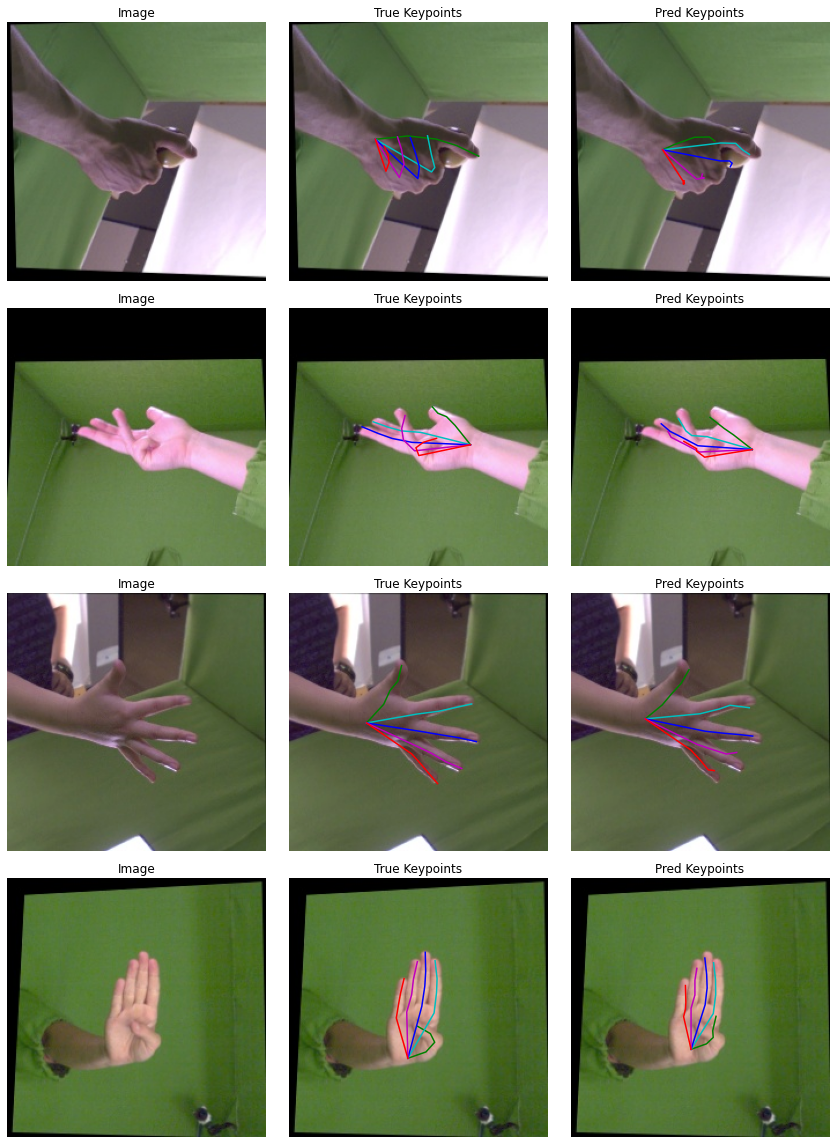

In [8]:
for data in test_dataloader:
    show_batch_predictions(data, model)
    break